# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

581

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Call API
units = "imperial"
base_url = "https://api.openweathermap.org/data/2.5/weather?"
query_url = f"{base_url}appid={api_key}&units={units}&q="

# Create a list to store the weather data for each city
city_names = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []

print("Beginning Data Retrieval")
print("---------------------------------")

record = 1
record_set = 1

for city in cities:
    response = requests.get(query_url + city).json()
    
    if response ["cod"] == '404':
        print("City Not Found. Skipping...")
    else:    
        city_names.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing Record {record} of Set {record_set} | {city}")
        record += 1
        
# Create count for processing records. Split into groups for easier viewing
    if record == 51:
        record_set += 1
        record = 1
        
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")

Beginning Data Retrieval
---------------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | biskamzha
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | trairi
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | pontevedra
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | khatanga
Processing Record 10 of Set 1 | tchibanga
City Not Found. Skipping...
Processing Record 11 of Set 1 | nantucket
Processing Record 12 of Set 1 | zhigansk
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | caravelas
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | vardo
City Not Found. Skipping...
Processing Record 17 of Set 1 | boden
Processing Record 18 of Set 1 | binga
Processing Record 19 of Set 1 | shingu
Processing Record 20 of Set 1 | cabra
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 

City Not Found. Skipping...
Processing Record 35 of Set 4 | george
City Not Found. Skipping...
Processing Record 36 of Set 4 | rocha
Processing Record 37 of Set 4 | rumuruti
Processing Record 38 of Set 4 | ahipara
Processing Record 39 of Set 4 | butaritari
Processing Record 40 of Set 4 | ilulissat
Processing Record 41 of Set 4 | grindavik
Processing Record 42 of Set 4 | lompoc
Processing Record 43 of Set 4 | deputatskiy
Processing Record 44 of Set 4 | tulle
Processing Record 45 of Set 4 | huescar
Processing Record 46 of Set 4 | pitsunda
Processing Record 47 of Set 4 | denpasar
City Not Found. Skipping...
Processing Record 48 of Set 4 | muriwai beach
Processing Record 49 of Set 4 | zharkent
Processing Record 50 of Set 4 | villa sandino
Processing Record 1 of Set 5 | le port
Processing Record 2 of Set 5 | ajdabiya
City Not Found. Skipping...
Processing Record 3 of Set 5 | dogondoutchi
Processing Record 4 of Set 5 | chokurdakh
Processing Record 5 of Set 5 | chuy
Processing Record 6 of Set

Processing Record 18 of Set 8 | ozernovskiy
City Not Found. Skipping...
Processing Record 19 of Set 8 | pochutla
Processing Record 20 of Set 8 | san quintin
Processing Record 21 of Set 8 | sola
Processing Record 22 of Set 8 | tabou
Processing Record 23 of Set 8 | togur
Processing Record 24 of Set 8 | havre-saint-pierre
Processing Record 25 of Set 8 | virginia beach
Processing Record 26 of Set 8 | kendari
Processing Record 27 of Set 8 | glens falls
Processing Record 28 of Set 8 | teya
Processing Record 29 of Set 8 | makakilo city
Processing Record 30 of Set 8 | lincoln
Processing Record 31 of Set 8 | marshfield
Processing Record 32 of Set 8 | maraa
Processing Record 33 of Set 8 | port blair
Processing Record 34 of Set 8 | atambua
Processing Record 35 of Set 8 | acajutla
Processing Record 36 of Set 8 | dyatkovo
Processing Record 37 of Set 8 | porto velho
Processing Record 38 of Set 8 | paralimni
Processing Record 39 of Set 8 | mujiayingzi
Processing Record 40 of Set 8 | gushikawa
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create dataframe
weather_data = pd.DataFrame({
    "City": city_names,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})

# Display the dataframe
weather_data.count()

City          518
Cloudiness    518
Country       518
Date          518
Humidity      518
Latitude      518
Longitude     518
Max Temp      518
Wind Speed    518
dtype: int64

In [10]:
# Export the city data in a csv
weather_data.to_csv("output_data/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

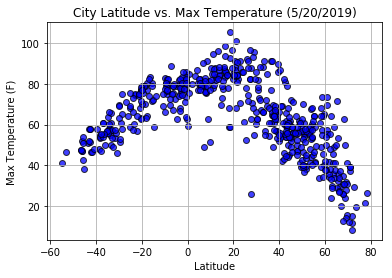

In [15]:
# Build a scatter plot for latitude and max temperature
plt.scatter(weather_data["Latitude"], weather_data["Max Temp"], marker = 'o', facecolors='blue', edgecolors = 'black', alpha = 0.75)

plt.title("City Latitude vs. Max Temperature (5/20/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save image 
plt.savefig("output_data/lat_vs_max_temp.png")

#### Latitude vs. Humidity Plot

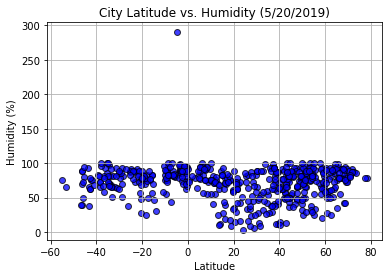

In [17]:
# Build scatter plot for latitude and Humidity
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker = 'o', facecolors='blue', edgecolors = 'black', alpha = 0.75)

plt.title("City Latitude vs. Humidity (5/20/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save image 
plt.savefig("output_data/lat_vs_humidity.png")

#### Latitude vs. Cloudiness Plot

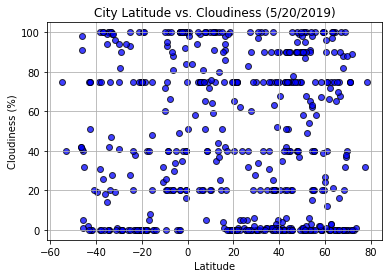

In [18]:
# Build scatter plot for latitude and Cloudiness
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker = 'o', facecolors='blue', edgecolors = 'black', alpha = 0.75)

plt.title("City Latitude vs. Cloudiness (5/20/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save image 
plt.savefig("output_data/lat_vs_cloud.png")

#### Latitude vs. Wind Speed Plot

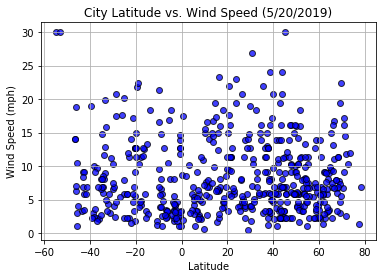

In [19]:
# Build scatter plot for latitude and Wind Speed
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker = 'o', facecolors='blue', edgecolors = 'black', alpha = 0.75)

plt.title("City Latitude vs. Wind Speed (5/20/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save image 
plt.savefig("output_data/lat_vs_wind_speed.png")